<a href="https://colab.research.google.com/github/abeerr33/abeer/blob/main/Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataTrain = pd.read_csv('housing_price_dataset.csv')
dataTrain.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [ ]:
type(dataTrain)

pandas.core.frame.DataFrame

In [ ]:
dataTrain.shape

(50000, 6)

In [ ]:
dataTrain.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [ ]:
dataTrain = dataTrain.dropna()

In [ ]:
dataTrain.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [ ]:
dataTrain.shape

(50000, 6)

In [ ]:
dataTrain.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [ ]:
plt.figure(figsize=(10,6))
corr = dataTrain.corr()

<Figure size 1000x600 with 0 Axes>

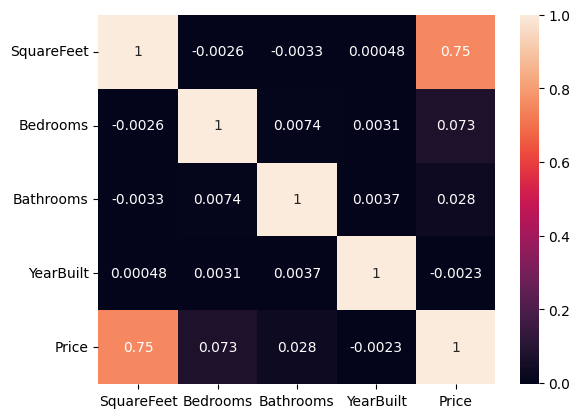

In [ ]:
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
dataTrain.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


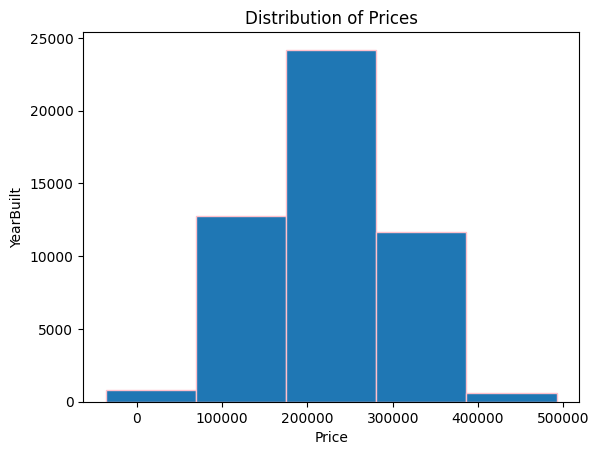

In [ ]:
dataTrain['Price'].plot(kind = 'hist', bins = 5, edgecolor='Pink')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('YearBuilt')
plt.title('Distribution of Prices')
plt.show()

In [ ]:
dataTrain.describe(include = 'object')

,Neighborhood
count,50000
unique,3
top,Suburb
freq,16721


<Axes: xlabel='SquareFeet', ylabel='Price'>

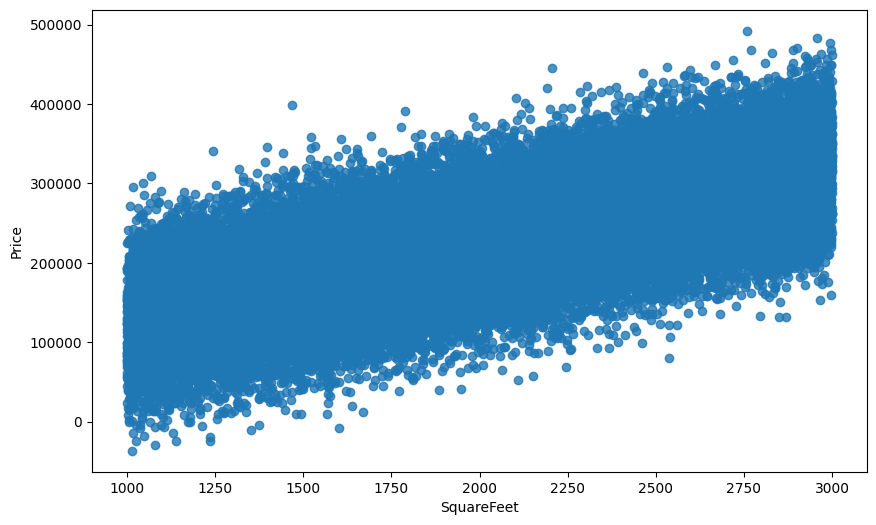

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="SquareFeet", y="Price", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['SquareFeet'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.750719785670884  with a P-value of P = 0.0


<Axes: xlabel='Bedrooms', ylabel='Price'>

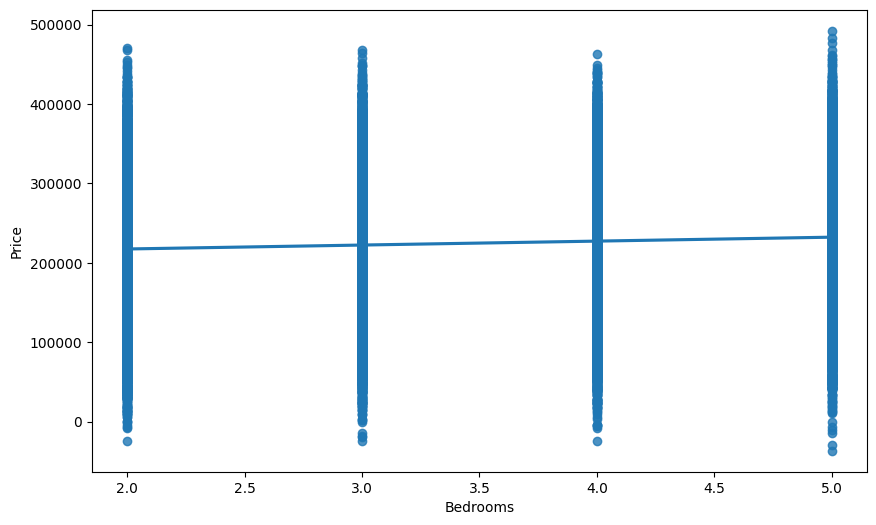

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="Bedrooms", y="Price", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['Bedrooms'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.07262393204089637  with a P-value of P = 1.8889710020155048e-59


<Axes: xlabel='Bathrooms', ylabel='Price'>

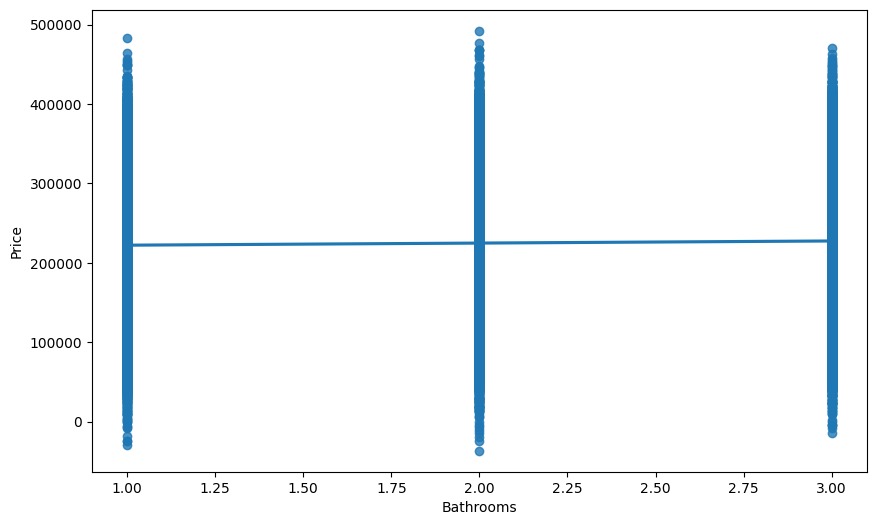

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="Bathrooms", y="Price", data= dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['Bathrooms'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.02841764814765268  with a P-value of P = 2.0774452962292115e-10


<Axes: xlabel='YearBuilt', ylabel='Price'>

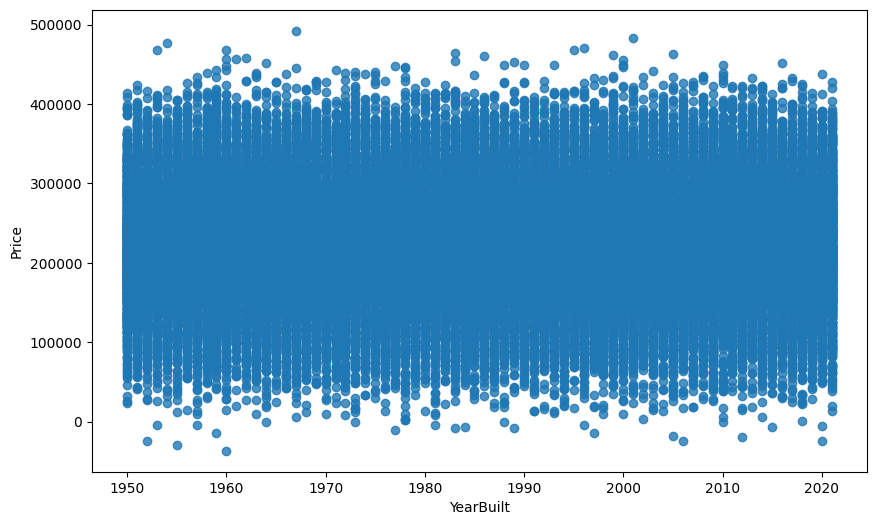

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="YearBuilt", y="Price", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['YearBuilt'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.0022883242547980195  with a P-value of P = 0.6088800701172937


<Axes: xlabel='SquareFeet', ylabel='Price'>

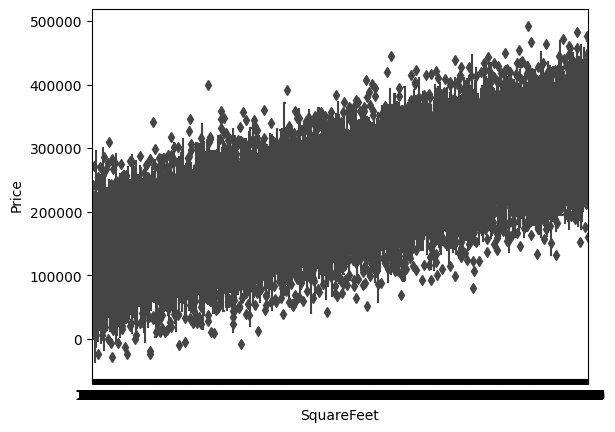

In [ ]:
sns.boxplot(x="SquareFeet", y="Price", data= dataTrain)

<Axes: xlabel='Bedrooms', ylabel='Price'>

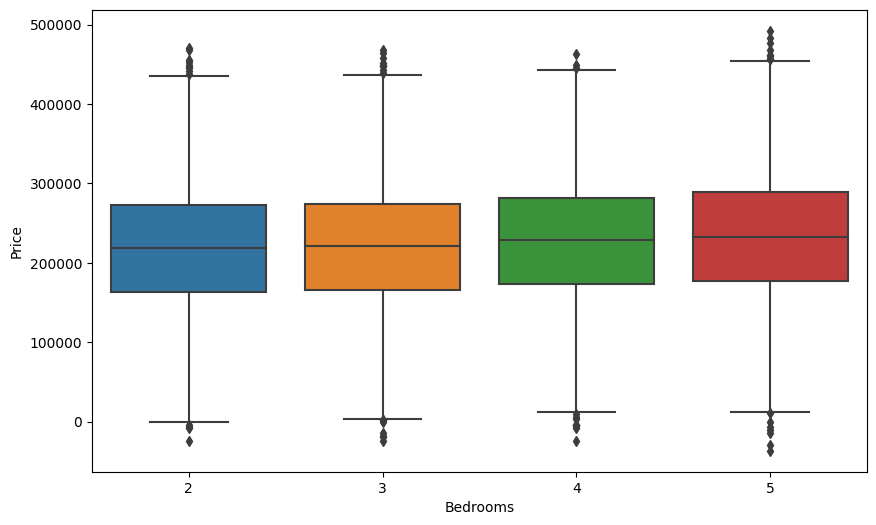

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Bedrooms", y="Price", data=dataTrain)

<Axes: xlabel='Bathrooms', ylabel='Price'>

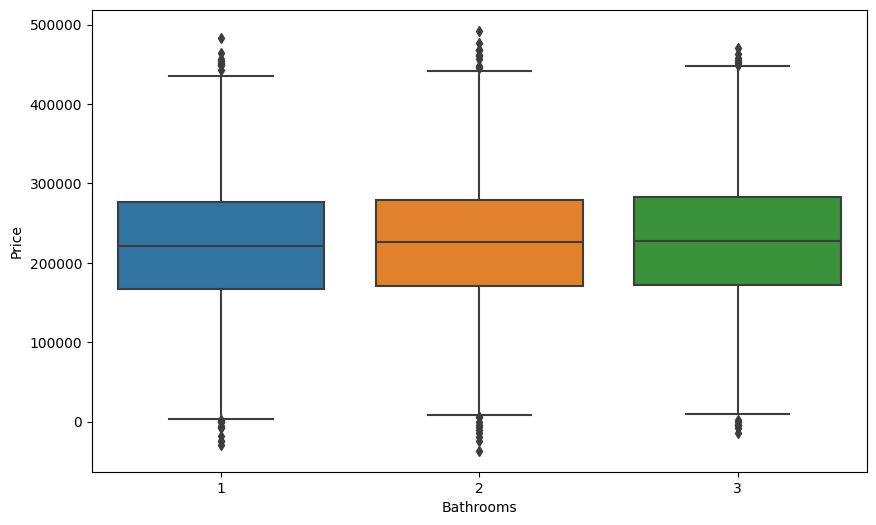

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Bathrooms", y="Price", data=dataTrain)

<Axes: xlabel='YearBuilt', ylabel='Price'>

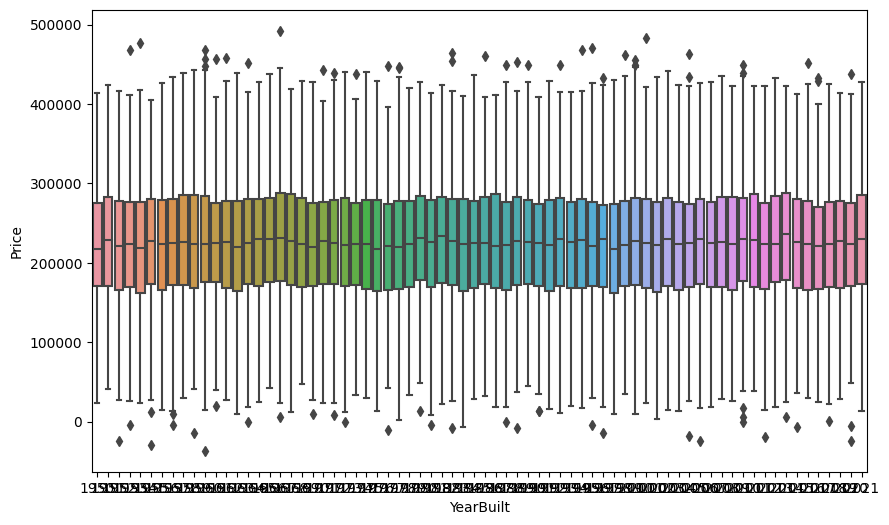

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="YearBuilt", y="Price", data=dataTrain)

<Axes: xlabel='Neighborhood', ylabel='Price'>

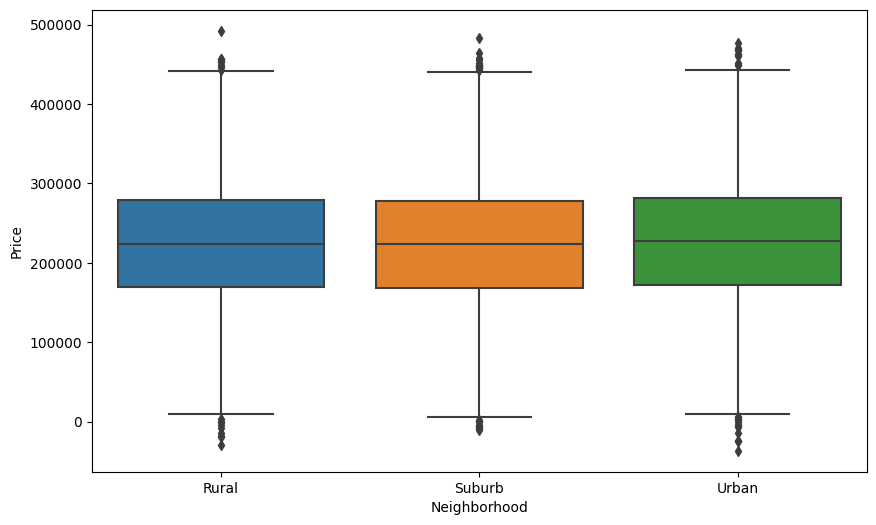

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Neighborhood", y="Price", data=dataTrain)

In [ ]:
dataTrain.drop(['Bedrooms', 'Bathrooms', 'Neighborhood'], axis = 1, inplace = True)

In [ ]:
dataTrain.shape

(50000, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.SquareFeet = labelencoder.fit_transform(dataTrain.SquareFeet)
dataTrain.YearBuilt = labelencoder.fit_transform(dataTrain.YearBuilt)

In [ ]:
dataTrain.head(10)

,SquareFeet,YearBuilt,Price
0,1126,19,215355.283618
1,1459,30,195014.221626
2,860,20,306891.012076
3,1294,46,206786.787153
4,1130,51,272436.239065
5,1095,70,198208.803907
6,1724,43,343429.319110
7,1044,7,184992.321268
8,1638,9,377998.588152
9,121,54,95961.926014


In [ ]:
import scipy.stats as stats
dataTrain= stats.zscore(dataTrain)

In [ ]:
dataTrain

,SquareFeet,YearBuilt,Price
0,0.207861,-0.791751,-0.124401
1,0.786480,-0.260842,-0.391551
2,-0.254340,-0.743486,1.077785
3,0.499777,0.511390,-0.236936
4,0.214811,0.752713,0.625272
...,...,...,...
49995,-1.258671,-0.502164,-1.638359
49996,1.472831,0.125274,1.965829
49997,1.690031,-1.129602,2.091949
49998,1.024531,-0.067784,2.044696


In [ ]:
from sklearn.model_selection import train_test_split
x = dataTrain.drop(['Price'], axis=1)
y = dataTrain['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
dataTrain.shape

(50000, 3)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33500, 2)
(16500, 2)
(33500,)
(16500,)


In [ ]:
x_train.head()

,SquareFeet,YearBuilt
23990,0.963715,1.621473
8729,-1.637467,1.476680
3451,1.302547,-0.888280
2628,-0.478490,1.428415
38352,1.368575,0.318332


In [ ]:
y_train.head()

23990    1.846008
8729    -1.653676
3451     0.533401
2628     0.307753
38352    0.809785
Name: Price, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [ ]:
y_pred1 = model_mlr.predict(x_test)

In [ ]:
y_test[0]

-0.1244011950019263

In [ ]:
y_pred1[0]

-0.14724899261125887

In [ ]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.4312525092499706


In [ ]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ',mae1)

The mean absolute error for Multiple Linear Regression:  0.5252279263762556


In [ ]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [ ]:
y_pred2 = model_rf.predict(x_test)

In [ ]:
mse2 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ',mae2)

The mean square error for Multiple Linear Regression:  0.5936211817844713


In [ ]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.5936211817844713


In [ ]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [ ]:
y_pred3 = model_lm.predict(x_test)

In [ ]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.8146136438841852


In [ ]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  0.9953696982936875


In [ ]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [ ]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.525228
1,Random Forest,0.593621
2,LASSO,0.814614


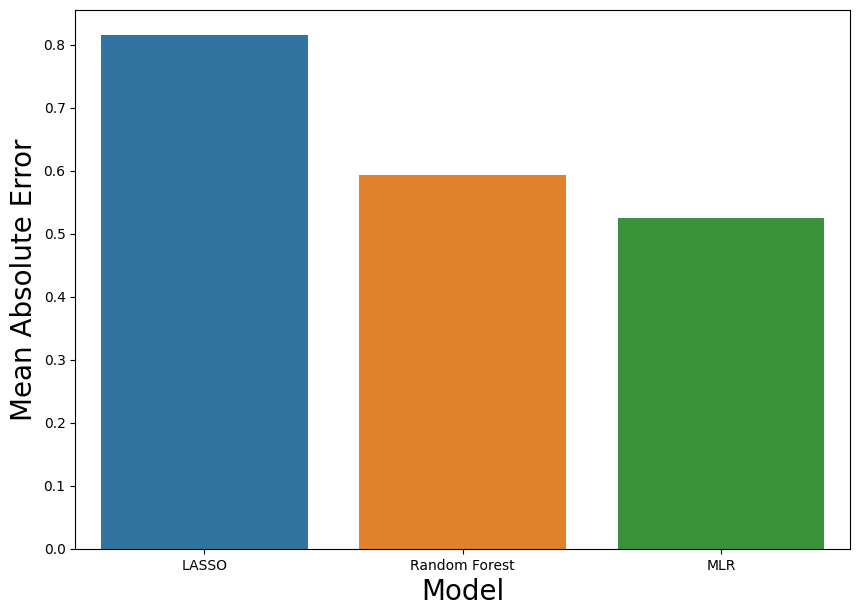

In [ ]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()